# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Perform Weather Check
weatherlist={}

for index in range(0,len(cities)):
    city=cities[index]
    print (f'processing record |{city}')
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'   

    response=requests.get(url)

    if response.status_code==200:

        weather_data=response.json()

        city_weather=[
            city,
            weather_data['clouds']['all'],
            weather_data['sys']['country'],
            weather_data['dt'],
            weather_data['main']['humidity'],
            weather_data['coord']['lat'],
            weather_data['coord']['lon'],
            weather_data['main']['temp_max'],
            weather_data['wind']['speed']
        ]
        
        weatherlist[index]=city_weather
    else:
        print('city not found. skipping')
print('------------------------------------------------------------')
print('data retrieval complete')
print('------------------------------------------------------------')

processing record |port elizabeth
processing record |busselton
processing record |mahebourg
processing record |victoria
processing record |illoqqortoormiut
city not found. skipping
processing record |rikitea
processing record |lakes entrance
processing record |puerto ayora
processing record |ushuaia
processing record |kaeo
processing record |mataura
processing record |binghamton
processing record |pedernales
processing record |atuona
processing record |tsienyane
city not found. skipping
processing record |uri
processing record |punta arenas
processing record |saint george
processing record |port hardy
processing record |attawapiskat
city not found. skipping
processing record |bambanglipuro
processing record |olbia
processing record |castro
processing record |hobart
processing record |hithadhoo
processing record |qaanaaq
processing record |armacao dos buzios
city not found. skipping
processing record |saint-philippe
processing record |guerrero negro
processing record |provideniya
proces

city not found. skipping
processing record |alta gracia
processing record |halalo
city not found. skipping
processing record |karakose
city not found. skipping
processing record |toccoa
processing record |matara
processing record |bilma
processing record |sabha
processing record |chifeng
processing record |mount isa
processing record |nikel
processing record |malwan
city not found. skipping
processing record |khatanga
processing record |sao filipe
processing record |humaita
processing record |bassano
processing record |yatou
processing record |shirokiy
processing record |moscow
processing record |canguaretama
processing record |thanh hoa
processing record |melo
processing record |esperance
processing record |pringsewu
processing record |west wendover
processing record |carballo
processing record |kloulklubed
processing record |bambous virieux
processing record |kankan
processing record |mayo
processing record |dennery
processing record |waipawa
processing record |itacoatiara
processing

processing record |alekseyevsk
processing record |markova
processing record |egvekinot
processing record |kilindoni
processing record |hambantota
processing record |oistins
processing record |loa janan
processing record |ormara
processing record |port augusta
processing record |hammerfest
processing record |beboto
processing record |gorontalo
processing record |srandakan
processing record |abu zabad
processing record |kungurtug
processing record |rocha
processing record |rio grande
processing record |taltal
processing record |nizhneyansk
city not found. skipping
processing record |urulga
city not found. skipping
processing record |rawson
processing record |erattupetta
processing record |deputatskiy
processing record |maroantsetra
processing record |kamarion
processing record |inhambane
processing record |comodoro rivadavia
processing record |karkaralinsk
city not found. skipping
processing record |port hawkesbury
processing record |moultonborough
processing record |georgiyevskoye
proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export City Data into a csv and Display the DataFrame
df=pd.DataFrame.from_dict(weatherlist,orient='index',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file, ",",header=True,columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'],index=True,index_label='City_ID')
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port elizabeth,75,ZA,1603646148,77,-33.92,25.57,66.20,12.75
1,busselton,0,AU,1603646148,58,-33.65,115.33,57.99,2.75
2,mahebourg,75,MU,1603645859,73,-20.41,57.70,75.20,14.99
3,victoria,95,HK,1603646104,79,22.29,114.16,75.00,1.01
5,rikitea,100,PF,1603646149,88,-23.12,-134.97,71.38,17.36
...,...,...,...,...,...,...,...,...,...
599,crestview,75,US,1603646226,78,30.76,-86.57,75.99,4.70
600,abeche,20,TD,1603646226,15,13.83,20.83,87.17,9.71
601,kuusamo,90,FI,1603646226,92,65.97,29.18,30.20,4.70
602,stuttgart,20,DE,1603646114,66,48.78,9.18,55.40,4.70


In [12]:
# Describe the DataFrame
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,55.289753,1.603475e+09,71.913428,18.844558,18.154664,62.032527,8.228004
std,36.786408,9.026737e+01,21.193702,33.250653,90.710036,21.751347,5.834941
min,0.000000,1.603474e+09,1.000000,-54.800000,-179.170000,-2.200000,0.360000
25%,20.000000,1.603475e+09,63.000000,-8.922500,-60.657500,47.145000,4.230000
50%,68.500000,1.603475e+09,76.000000,20.970000,22.625000,69.090000,6.930000
75%,90.000000,1.603475e+09,87.000000,46.512500,102.330000,78.750000,11.135000
max,100.000000,1.603475e+09,100.000000,78.220000,179.320000,101.660000,48.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

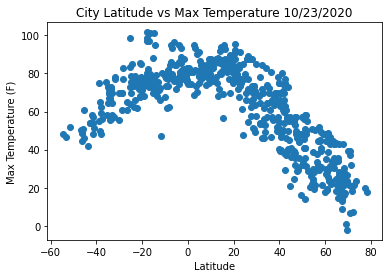

In [15]:
# Scatter Plot Lattitude vs Temperature
x=df['Lat']
y=df['Max Temp']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature 10/23/2020')
plt.show()

## Latitude vs. Humidity Plot

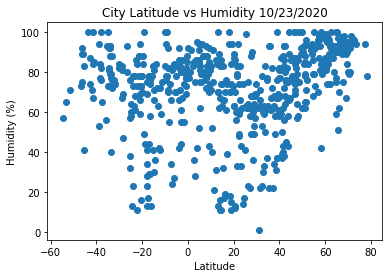

In [16]:
# Scatter Plot Lattitude vs Humidity
x=df['Lat']
y=df['Humidity']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity 10/23/2020')
plt.show()

## Latitude vs. Cloudiness Plot

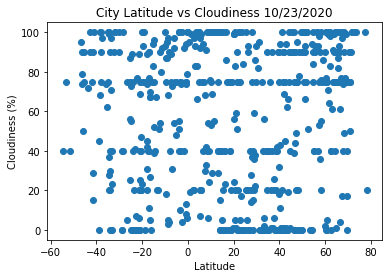

In [17]:
# Scatter Plot Lattitude vs Cloudiness
x=df['Lat']
y=df['Cloudiness']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness 10/23/2020')
plt.show()

## Latitude vs. Wind Speed Plot

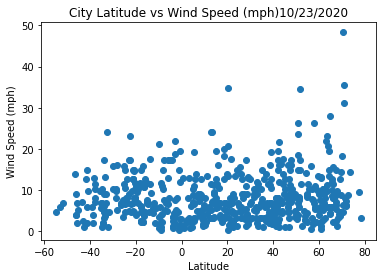

In [19]:
# Scatter Plot Lattitude vs Wind Speed
x=df['Lat']
y=df['Wind Speed']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph)10/23/2020')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R value is  -0.8885301765079167


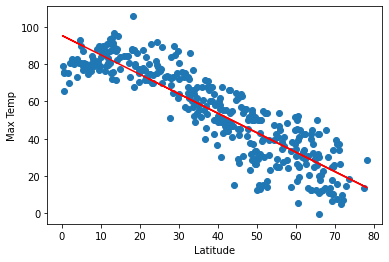

In [15]:
#Northern Hemisphere Scatter Plot with Linear Regression: Max Temp vs. Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Max Temp']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R value is  0.7073040331825534


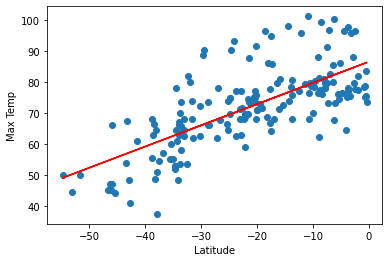

In [24]:
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Max Temp']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is  0.3561915165221735


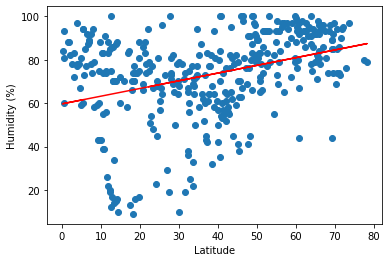

In [22]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Humidity vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Humidity']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is  -0.07888621745439829


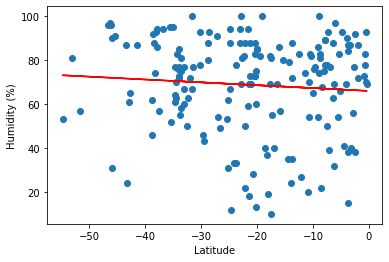

In [25]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Humidity vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Humidity']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is  0.20021965187154664


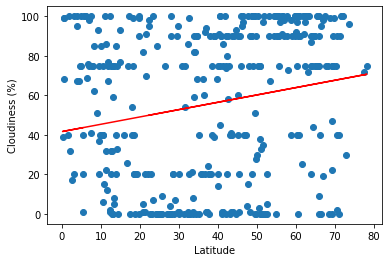

In [18]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Cloudiness(%) vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Cloudiness']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is  0.07999759688929242


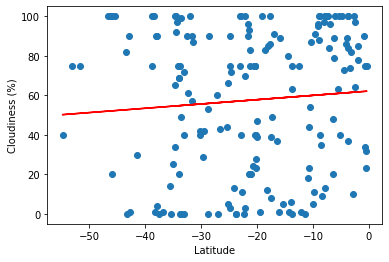

In [26]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Cloudiness(%) vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Cloudiness']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is  0.16089257844966032


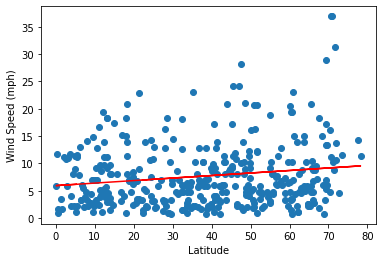

In [19]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Wind Speed vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Wind Speed']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is  -0.21563927229700366


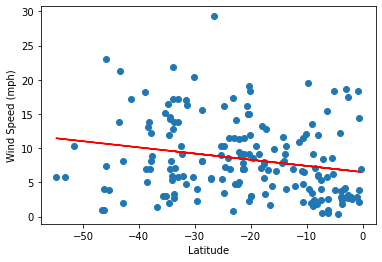

In [27]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Wind Speed vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Wind Speed']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()